# Data Generation and Visualization

## Exercise 1

- Generate a dataset drawn from two independent Gaussians, each of which represents a class. You are free to select the number of desired datapoints, the mean, and the variance of the two distributions.

- Flip randomly a percentage of the labels to introduce some noise and plot the results. Given the binary classification setting we are considering, a flip implies that a point in class 0 will be assigned to class 1 and vice versa.

Let's start by defining the two Gaussians with arbitrary parameters:

$$X \sim \mathcal{N}(\mu=0, \sigma^2=2)$$
$$Y \sim \mathcal{N}(\mu=3, \sigma^2=0.75)$$

$$N = 1000$$

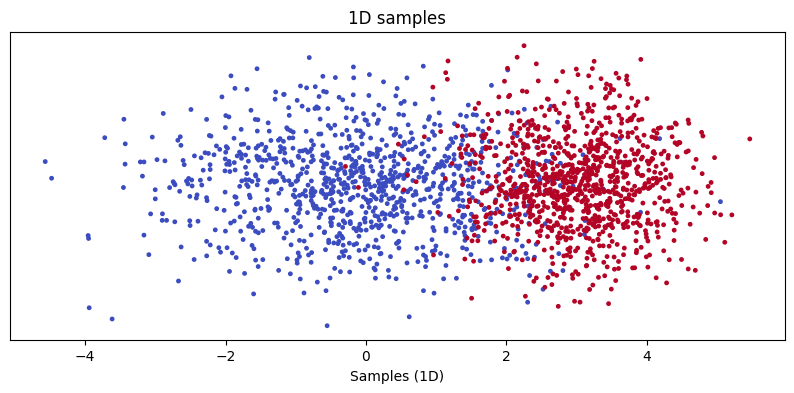

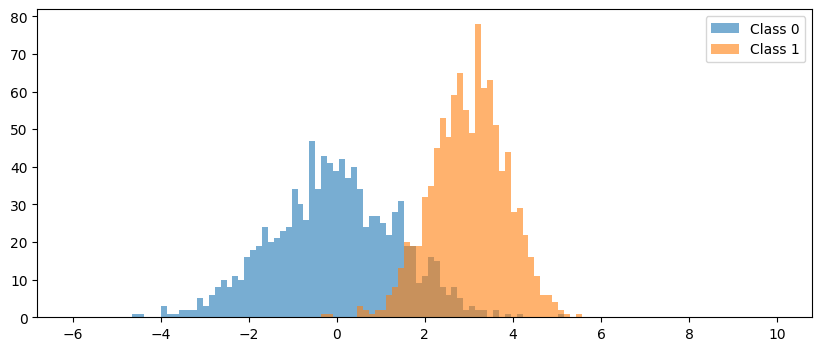

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

np.random.seed(123)

# Gaussian definition
n = 1000
g1 = np.random.normal(0, np.sqrt(2), n)
g2 = np.random.normal(3, np.sqrt(0.75), n)

# Dataset
X = np.concatenate([g1, g2])
y = np.concatenate([np.zeros(n), np.ones(n)])

# Scatter plot
jitter = np.random.normal(scale=0.06, size=len(y))
plt.figure(figsize=(10,4))
plt.scatter(X, jitter, c=y, cmap='coolwarm', s=6)
plt.yticks([])
plt.xlabel('Samples (1D)')
plt.title(f'1D samples')
plt.show()

# Histogram
plt.figure(figsize=(10,4))
bins = np.linspace(-6, 10, 120)
plt.hist(X[y==0], bins=bins, alpha=0.6, label='Class 0')
plt.hist(X[y==1], bins=bins, alpha=0.6, label='Class 1')
plt.legend()
plt.show()

Now we will introduce some noise by randomly flipping the $10\%$ of the labels.

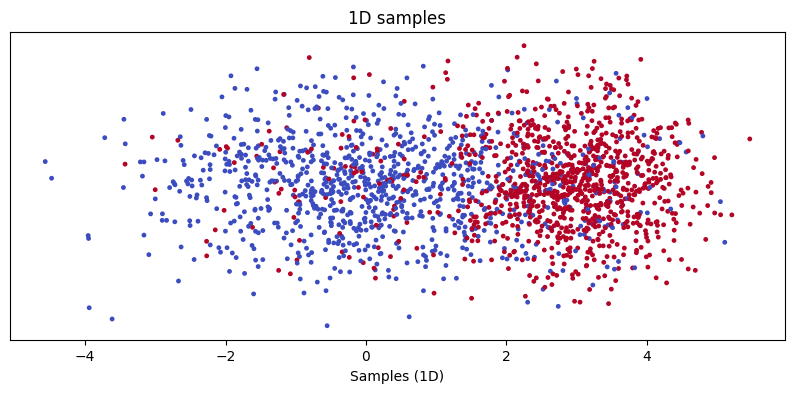

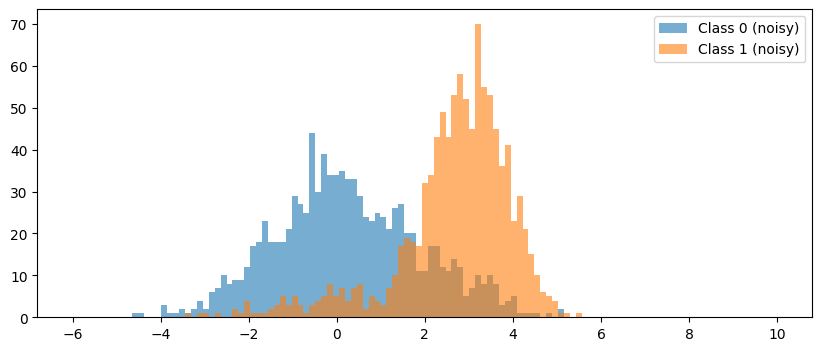

In [38]:
p = 0.1

# Select indices
idx = np.random.choice(len(y), size=(int(p*len(y))), replace=False)
y_noisy = y.copy()
y_noisy[idx] = 1 - y_noisy[idx]

# Scatter plot
plt.figure(figsize=(10,4))
plt.scatter(X, jitter, c=y_noisy, cmap='coolwarm', s=6)
plt.yticks([])
plt.xlabel('Samples (1D)')
plt.title(f'1D samples')
plt.show()

# Histogram
plt.figure(figsize=(10,4))
bins = np.linspace(-6, 10, 120)
plt.hist(X[y_noisy==0], bins=bins, alpha=0.6, label='Class 0 (noisy)')
plt.hist(X[y_noisy==1], bins=bins, alpha=0.6, label='Class 1 (noisy)')
plt.legend()
plt.show()

## Exercise 2

The Swiss Roll is defined by the following mapping:

$$x = \phi \cos (\phi),\quad y = \phi \sin (\phi),\quad z = \psi$$

with $\phi \in (1.5\pi, 4.5\pi)$ and $\psi \in (0, 10)$.

Create a dataset of $n = 1000$ points and plot them both in 2d and 3d.

In [39]:
# Sampling
n = 1000
phi = np.random.uniform(1.5*np.pi, 4.5*np.pi, n)
psi = np.random.uniform(0, 10, n)

# Coordinates
x = phi*np.cos(phi)
y = phi*np.sin(phi)
z = psi

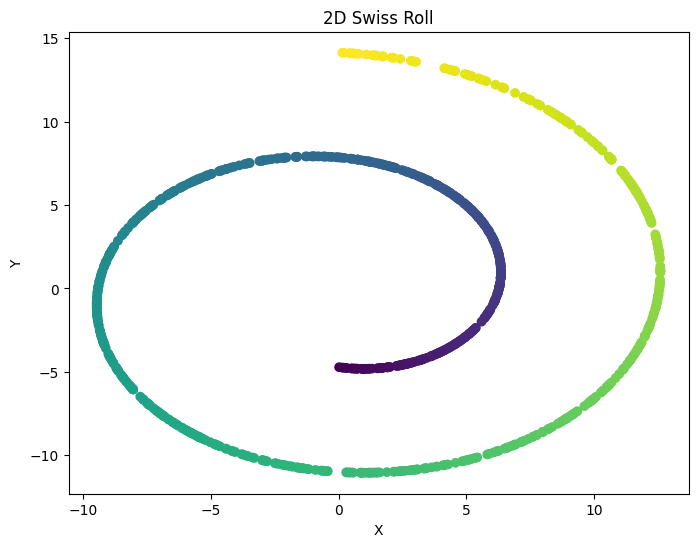

In [40]:
# 2d plot
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y, c=phi, cmap='viridis')

# Labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Swiss Roll')

plt.show()

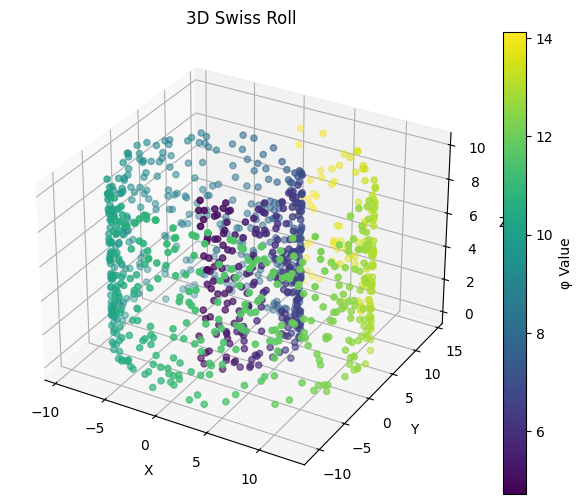

In [41]:
# Static 3d plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter3D(x, y, z, c=phi, cmap='viridis')
plt.colorbar(sc, ax=ax, label='φ Value')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Swiss Roll')

plt.show()


# Dynamic 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=phi,
        colorscale='Viridis',
        opacity=1,
        colorbar=dict(title="φ value")
    )
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z")
    ),
    title="3D Swiss Roll",
    margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()

## Exercise 3

Find the equation describing the Klein bottle problem. Generate a dataset and plot it as in Exercise 2.

Following the parametrization of the usal 3-dimensional immersion of the Klein bottle:

$$x(u,v) = -\frac{2}{15} \cos u \Big(3 \cos v - 30 \sin u + 90 \cos^{4} u \sin u - 60 \cos^{6} u \sin u + 5 \cos u \cos v \sin u \Big)$$

$$y(u,v) = -\frac{1}{15} \sin u \Big(3 \cos v - 3 \cos^{2} u \cos v - 48 \cos^{4} u \cos v + 48 \cos^{6} u \cos v - 60 \sin u + 5 \cos u \cos v \sin u - 5 \cos^{3} u \cos v \sin u - 80 \cos^{5} u \cos v \sin u + 80 \cos^{7} u \cos v \sin u \Big)$$

$$z(u,v) = \frac{2}{15} \left(3 + 5 \cos u \sin u \right) \sin v$$

with $0 \leq u < \pi$, and $0 \leq v < 2\pi$.

In [42]:
# Sampling
n = 5000
u =  np.random.uniform(0, 2*np.pi, n)
v =  np.random.uniform(0, 2*np.pi, n)

x = - (2/15) * np.cos(u) * (3 * np.cos(v) - 30 * np.sin(u) + 90 * np.cos(u)**4 * np.sin(u) - 60 * np.cos(u)**6 * np.sin(u) + 5 * np.cos(u) * np.cos(v) * np.sin(u))
y = - (1/15) * np.sin(u) * (3 * np.cos(v) - 3 * np.cos(u)**2 * np.cos(v) - 48 * np.cos(u)**4 * np.cos(v) + 48 * np.cos(u)**6 * np.cos(v) - 60 * np.sin(u) + 5 * np.cos(u) * np.cos(v) * np.sin(u) - 5 * np.cos(u)**3 * np.cos(v) * np.sin(u) - 80 * np.cos(u)**5 * np.cos(v) * np.sin(u) + 80 * np.cos(u)**7 * np.cos(v) * np.sin(u))
z = (2/15) * (3 + 5 * np.cos(u) * np.sin(u)) * np.sin(v)

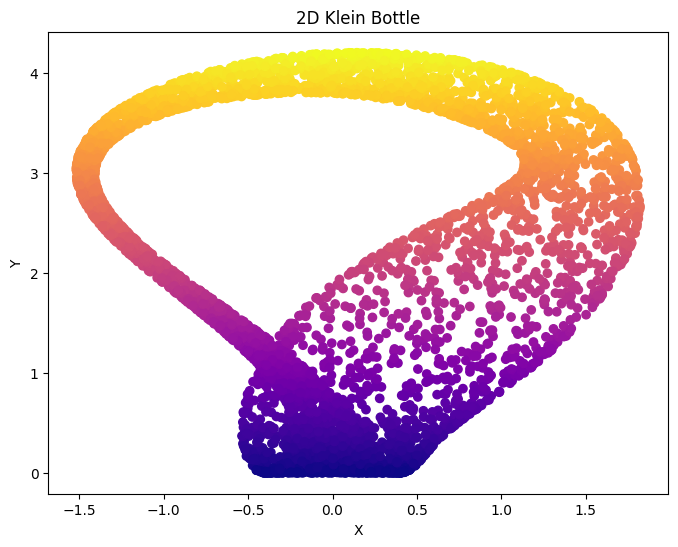

In [43]:
# 2d plot
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y, c=y, cmap='plasma')

# Labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Klein Bottle')

plt.show()

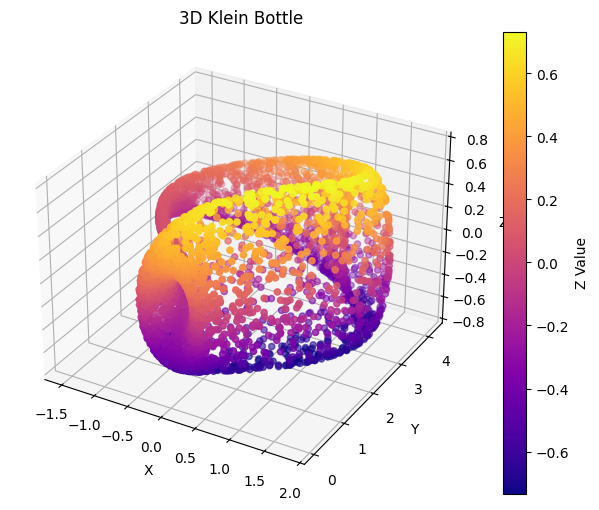

In [44]:
# Static 3D Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter3D(x, y, z, c=z, cmap='plasma')
plt.colorbar(sc, ax=ax, label='Z Value')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Klein Bottle')

plt.show()


# Dynamic 3D Plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=z,
        colorscale='Plasma',
        opacity=1,
        colorbar=dict(title="Z value")
    )
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z")
    ),
    title="3D Klein Bottle",
    margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()
